In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("btc-market-price.csv")
df.head()

,2017-04-02 00:00:00,1099.169125
0,2017-04-03 00:00:00,1141.813000
1,2017-04-04 00:00:00,1141.600363
2,2017-04-05 00:00:00,1133.079314
3,2017-04-06 00:00:00,1196.307937
4,2017-04-07 00:00:00,1190.454250


- Bu şekilde okuma yaptığımızda ilk satırı sütun ismi olarak alacağı için hata olacaktır. Bunu engellemek için:

In [3]:
df = pd.read_csv("btc-market-price.csv", header=None)
df.head()

,0,1
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


- Böylece dataframe'e sütun ismi ekleyebiliriz.

In [4]:
df.columns = ["Times", "Prices"]
df.head()

,Times,Prices
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [5]:
df.tail()

,Times,Prices
360,2018-03-28 00:00:00,7960.380000
361,2018-03-29 00:00:00,7172.280000
362,2018-03-30 00:00:00,6882.531667
363,2018-03-31 00:00:00,6935.480000
364,2018-04-01 00:00:00,6794.105000


In [6]:
df.dtypes

Times      object
Prices    float64
dtype: object

- yukarida gördügümüz gibi Times sütunu string'tir. Bunu değiştirmek için:

In [7]:
pd.to_datetime(df.Times).head()

0   2017-04-02
1   2017-04-03
2   2017-04-04
3   2017-04-05
4   2017-04-06
Name: Times, dtype: datetime64[ns]

In [8]:
df.Times = pd.to_datetime(df.Times)

In [9]:
df.dtypes

Times     datetime64[ns]
Prices           float64
dtype: object

- Eğer bu tarihleri index olarak güncellemek istersek:

In [10]:
df.set_index("Times", inplace=True)
df.head()

,Prices
Times,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937
...,...
2018-03-28,7960.380000
2018-03-29,7172.280000
2018-03-30,6882.531667


In [13]:
df.loc["2017-09-27"]

Prices    4202.554983
Name: 2017-09-27 00:00:00, dtype: float64

- Yukaridaki islemlerin hepsini tabloyu olustururken gerceklestirebiliriz.

In [14]:
df2 = pd.read_csv(
    "btc-market-price.csv",
    header=None,
    names=["Times", "Prices"],
    index_col=0,
    parse_dates=True
)

In [15]:
df2.head()

,Prices
Times,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


## Plot işlemi
Pandas kütüphanesi ile basit grafikler çizdirebiliriz.

<AxesSubplot:xlabel='Times'>

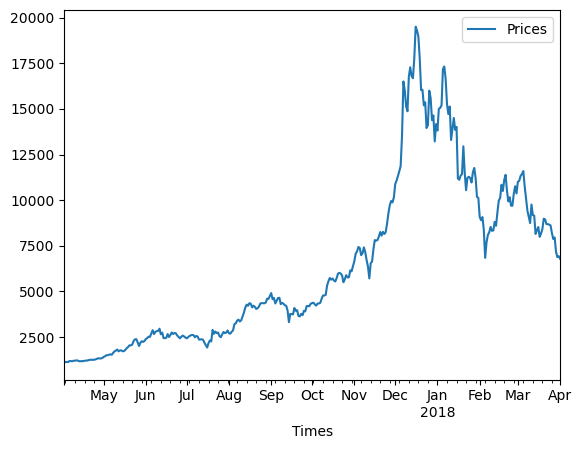

In [17]:
df.plot()